<a href="https://colab.research.google.com/github/AyushiRwt20/Email-Spam-Detection-/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-MAIL SPAM DETECTION**

#**Importing** **Libraries**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


#**Importing** **Data Set** **from** **Drive**

In [35]:
from google.colab import drive
print("importing csv file from drive")
drive.mount('/content/drive')
path="/content/spams.csv"
df = pd.read_csv('/content/drive/MyDrive/spams.csv',encoding='latin-1')
ch=input("want to display the dataframe?( Y/N):")
if (ch=="Y" or ch=="y"):
  print(df.head(4))
else:
  print("OK continuing the programme.")
print("-*-"*20)

importing csv file from drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
want to display the dataframe?( Y/N):n
OK continuing the programme.
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


# **1. DATA CLEANING**

> Indented block



In [36]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
#Renaming the Columns
df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)
df

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [38]:
## Removing the Last Three Columns

##final_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0)
##final_df.sample(5)
final_df = df.iloc[:, :-3]

In [39]:
## Changing My Target to Labels


from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Category' column in your DataFrame
df['Type'] = le.fit_transform(df["Type"])

In [40]:
final_df.sample(5)

,Type,SMS
2326,ham,The Xmas story is peace.. The Xmas msg is love...
3818,ham,"sorry brah, just finished the last of my exams..."
807,ham,Boooo you always work. Just quit.
2922,ham,Fine am simply sitting.
32,ham,K tell me anything about you.


In [41]:
## Checking Missing Values
final_df.isnull().sum()

Type    0
SMS     0
dtype: int64

In [42]:
##Check for Duplicated Values
final_df.duplicated().sum()

403

In [43]:
##Remove Duplicates
final_df = final_df.drop_duplicates(keep='first')
final_df.head()

,Type,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
final_df.shape

(5169, 2)

In [45]:
final_df.duplicated().sum()

0

In [46]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2.**DATA** **PREPROCESSING**

#    

In [47]:
# let's do data preprocessing like remove punctucation, stopwords, stemming.
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)

    return " ".join(y)

In [16]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

'love yt lectur machin learn dace danc danc'

In [17]:
df['transformed_text'] = df['SMS'].apply(text_processing)

In [18]:
final_df.head()

,Type,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [32]:
X = df['SMS']
Y = df['Type']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Vectorize the text data
Vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, min_df=1)
feature_extraction = Vectorizer.fit(X_train)
X_train_features = feature_extraction.transform(X_train)
X_test_features = feature_extraction.transform(X_test)


#**3.DATA VISULISATION**


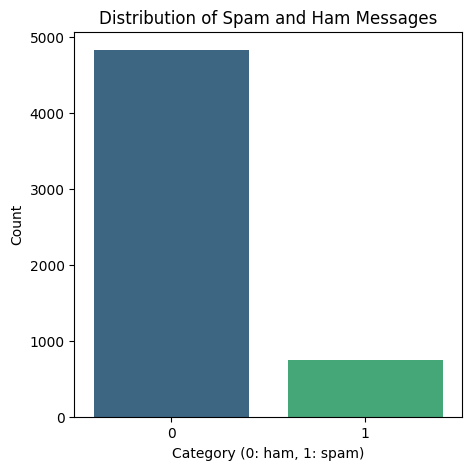

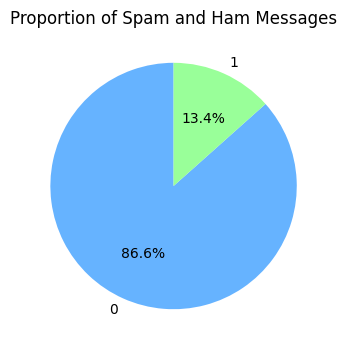

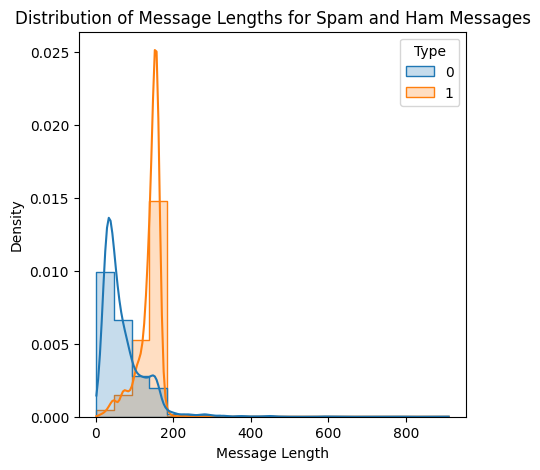

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'Category' column contains 'spam' and 'ham'
# df.loc[df['Category']=='spam','Category'] = 0
# df.loc[df['Category']=='ham','Category'] = 1
# Distribution of Spam and Ham Messages
plt.figure(figsize=(5, 5))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category (0: ham, 1: spam)')
plt.ylabel('Count')
plt.show()

# Pie Chart for Proportion of Spam and Ham Messages
plt.figure(figsize=(4, 4))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Proportion of Spam and Ham Messages')
plt.ylabel('')
plt.show()

# Distribution of Message Lengths
df['Message Length'] = df['SMS'].apply(len)

plt.figure(figsize=(5, 5))
sns.histplot(df, x='Message Length', hue='Type', element='step', stat='density', common_norm=False, bins=20, kde=True)
plt.title('Distribution of Message Lengths for Spam and Ham Messages')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()


#LOGISTIC REGRESSION

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_features, Y_train)
prediction_logistic = logistic_model.predict(X_test_features)

In [24]:
accuracy_logistic = accuracy_score(Y_test, prediction_logistic)
print('Accuracy on test data (Logistic Regression):', accuracy_logistic)


Accuracy on test data (Logistic Regression): 0.9623318385650225


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

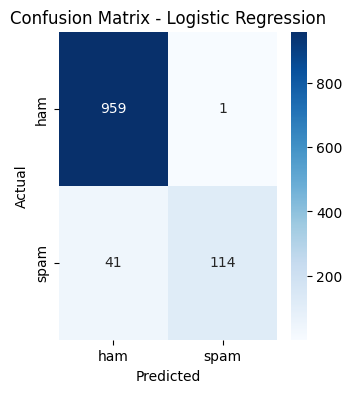

In [25]:
# Plot confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(Y_test, prediction_logistic)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues",
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

#KNN

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_features, Y_train)
prediction_knn = knn_model.predict(X_test_features)

In [27]:
accuracy_knn = accuracy_score(Y_test, prediction_knn)
print('Accuracy on test data (KNN):', accuracy_knn)


Accuracy on test data (KNN): 0.9201793721973094


Text(0.5, 1.0, 'Confusion Matrix - KNN')

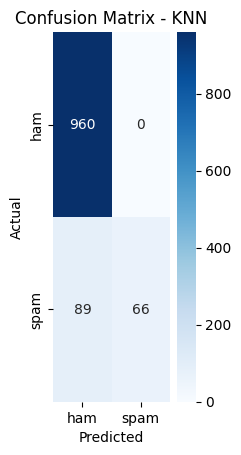

In [28]:
# Plot confusion matrix for KNN
conf_matrix_knn = confusion_matrix(Y_test, prediction_knn)
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')

#NAIVE BAYES

In [29]:
nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)
prediction_nb = nb_model.predict(X_test_features)


In [30]:
accuracy_nb = accuracy_score(Y_test, prediction_nb)
print('Accuracy on test data (Naive Bayes):', accuracy_nb)

Accuracy on test data (Naive Bayes): 0.9713004484304932


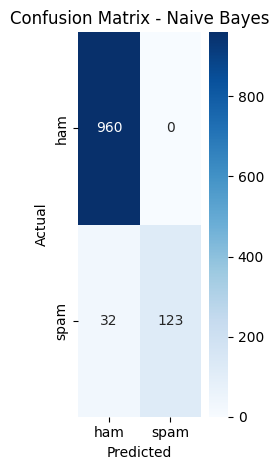

In [31]:
# Plot confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(Y_test, prediction_nb)

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')

plt.tight_layout()
plt.show()